# Loan Application Status Prediction 

**OBJECTIVE :** Dataset includes details of applicants who have applied for loan. It includes details like credit history, loan amount, their income, dependents etc.To build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset.

**Variables**    
**Independent Variables:**

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

**Dependent Variable (Target Variable):**

- Loan_Status

**IDENTIFYING TYPE :** Target variable is categorical contains variable 'Y' or 'N', This is a classic case of Binary Classification and hence Logistic Regression algorithm best suits.However we will apply classification algorithms such as DecisionTree Classifier, RandomForest Classifier and SVM to verify best predicted model as per initial hypothesis.

### IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings("ignore")

### LOADING DATA

In [2]:
#Loading the data and converting to DataFrame.
df= pd.read_csv("loan_prediction.csv")
df=pd.DataFrame(data=df)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# Size of data
df.shape

(614, 13)

In [4]:
#Columns in data
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
# Datatype information.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


***DATA DESCRIPTION :***   Now we have a dataset of **614** samples and **13** features/columns. Most of the features are categorical and some are numerical. Target variable (Loan_Status) is categorical. Certain features like Loan_id, Loan_Amount_Term seems irrelevant in my initial analysis.

In [6]:
# Statistical info
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


As per statistical information, there are missing values in some columns such as LoanAmount and Credit_History.  
Salary ranges from 150.00 to 81,000.00  

### EDA Exploratory Data Analysis

1. Handling Missing values

In [7]:
# Check full null/missing values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Lets fill the numeric Nan values with respective mean value.  
Also the Categorical value with mode value.  
Initially I tried another approach by dropping the Nan values using dropna(), However then I noticed more than 100 rows were deleted while dropping Nan values and hence changed the approach.

In [8]:
# Filling the three numeric values with mean()/average value.

df['LoanAmount']= df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']= df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']= df['Credit_History'].fillna(df['Credit_History'].mean())

In [9]:
# Mode values
df['Self_Employed'].mode()

0    No
dtype: object

In [10]:
# Filling the three categoric values with Most frequent value/mode().

df['Gender']= df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']= df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']= df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']= df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [11]:
# All null values are replaced.
df['Gender'].isnull().sum()

0

In [12]:
# Converting target variable(categorical) to numeric, for that we use Label encoding technique.
# Label Encoding using pandas DataFrame replace function

df.replace({'Loan_Status':{'N':0,'Y':1}},inplace = True)

In [13]:
# Checking encoded Variable
df['Loan_Status'].head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

Values of dependent variables.

In [14]:
df['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [15]:
df['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [16]:
# Replacing 3+ to 4 as i worked with 3+ and in the end during modelling it threw an error saying its a string.
# So converting it to a numeral.
df= df.replace(to_replace='3+',value=4)

**DATA VISUALIZATION**

<AxesSubplot:ylabel='Loan_Status'>

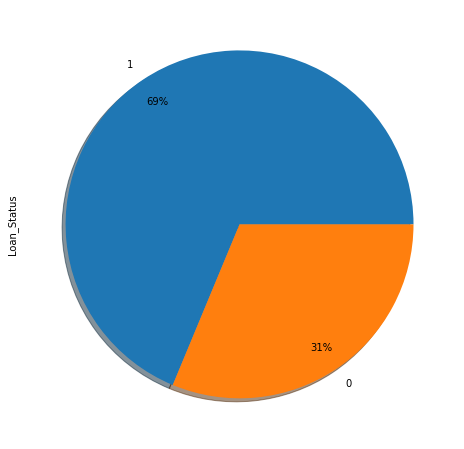

In [17]:
# Target Variable
# Loan Status

plt.figure(figsize=(10,8))
df['Loan_Status'].value_counts().plot(kind='pie',shadow=True,autopct='%0.f%%',pctdistance=0.85)

'Y' is reresented by 1 and 'N' by 0.  
Loan Status is approved for 69% and rejected for 31%.  
So approval rate is pretty good.  
Lets evaluate further features.

<AxesSubplot:xlabel='Gender', ylabel='count'>

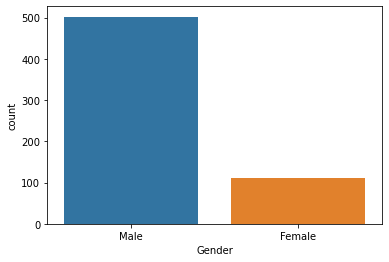

In [18]:
# Lets evaluate the Gender column
sns.countplot(df['Gender'])

Approximate 500 male applicants whereas female is a little higher than 100.

<AxesSubplot:xlabel='Married', ylabel='count'>

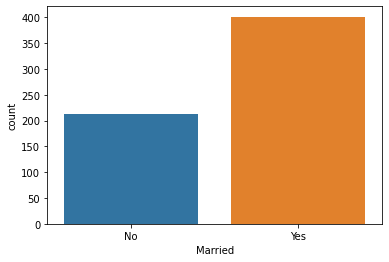

In [19]:
# Lets evaluate the Married column
sns.countplot(df['Married'])

Most of the applicants are married.  
So there could be higher chance for married male applicants approval is favourable.

<AxesSubplot:xlabel='Dependents', ylabel='count'>

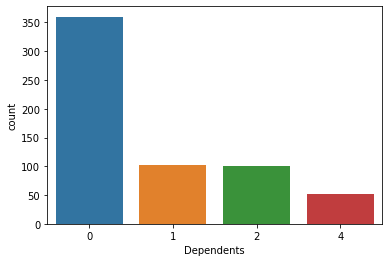

In [20]:
# Lets evaluate the Dependents column
sns.countplot(df['Dependents'])

Majority of the applicants doesnt have dependents.

<AxesSubplot:xlabel='Education', ylabel='count'>

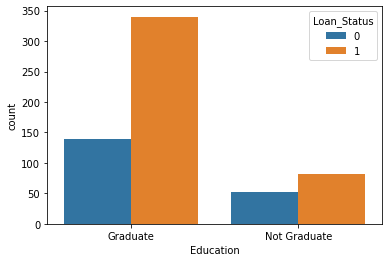

In [21]:
# Now lets evaluate relation of other variables to target variable.
# Education vs Loan_Status.
sns.countplot(x=df['Education'], hue= df['Loan_Status'], data=df)

 Approval rate is remarkably higher for Graduates.  
 So we can say that graduate is a prime factor for approval.

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

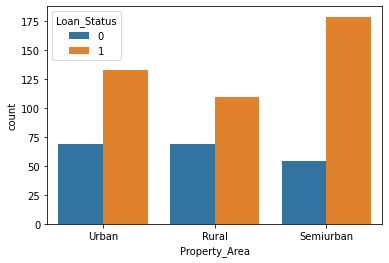

In [22]:
# Maritual Status vs Loan_Status
sns.countplot(x=df['Property_Area'], hue= df['Loan_Status'], data=df)

Approvals are higher and rejections are least for Semiurban area.  
However i assume we cannot consider this as an important information to determine target variable.

<AxesSubplot:xlabel='Married', ylabel='count'>

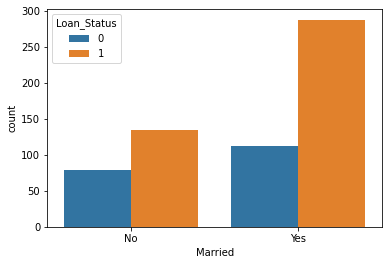

In [23]:
# Maritual Status vs Loan_Status
sns.countplot(x=df['Married'], hue= df['Loan_Status'], data=df)

We can see a approval is higher close to 300 for married applicants.  
Income of the spouse added, could be a reason for this higher approval.     
Inorder to evaluate further columns lets convert categorical vales to numerals.

<AxesSubplot:>

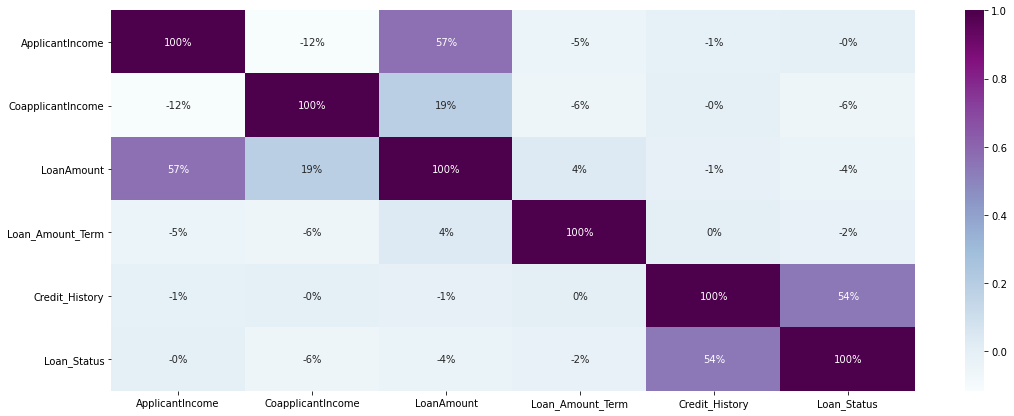

In [24]:
# Lets check for correlation.
plt.figure(figsize=(18,7))
sns.heatmap(df.corr(), annot=True,cmap='BuPu',fmt='.0%')

we can see some positive correlation here with the target variable.  
Gender, Married, Education,Property_Area has lowest correlation (<10%) with Loan_Status.  
Some serious insights, Variables like Self_Employed, Applicantincome shows 0% correlation.  
Credit history is the prime factor having highest correlation (54%).  

In [25]:
# Converting Categorical to Numeric value.

df.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [26]:
# Now all we have is numerical values except Load_id which we will de dropping as its irrelevant for modelling.
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0


In [27]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


In [28]:
# Dropping Loan_ID column
df=df.drop('Loan_ID',axis=1)

### MODELLING

In [29]:
# Separating Attributes and target variables.
y=df['Loan_Status']
x=df.drop('Loan_Status',axis=1)

In [30]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.2,stratify=y, random_state=42)

In [31]:
# we can see here how dataset is divided.
print(x.shape, x_train.shape, x_test.shape)

(614, 11) (491, 11) (123, 11)


**1. LOGISTIC REGRESSION**

In [32]:
lr= LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train) #Accuracy score on train data
predlr= lr.predict(x_test)
# Confusion matrix and accuracy score on test data
print("Confusion Matrix:",confusion_matrix(y_test,predlr))
print("Classification Report:",classification_report(y_test,predlr))
print("Accuracy score:",accuracy_score(y_test, predlr)) 

Confusion Matrix: [[22 16]
 [ 1 84]]
Classification Report:               precision    recall  f1-score   support

           0       0.96      0.58      0.72        38
           1       0.84      0.99      0.91        85

    accuracy                           0.86       123
   macro avg       0.90      0.78      0.81       123
weighted avg       0.88      0.86      0.85       123

Accuracy score: 0.8617886178861789


In [33]:
# Cross Validated score for Logistic Regression
scr1= cross_val_score( lr,x,y, cv=10)
print("Cross Validated score for LR is:",scr1.mean())

Cross Validated score for LR is: 0.8047065044949762


**ROC-AUC CURVE**

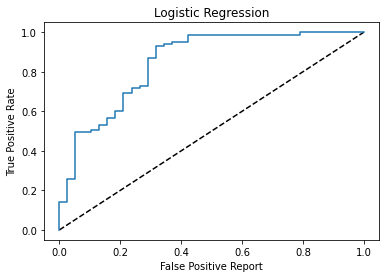

In [34]:
y_pred_prob= lr.predict_proba(x_test)[:,1]

fpr,tpr,thresholds=  roc_curve(y_test,y_pred_prob )
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False Positive Report')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression')
plt.show()

**2. RANDOM FOREST CLASSIFIER**

In [35]:
rfc= RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train) #Accuracy score on train data
predrfc= rfc.predict(x_test)
# Confusion matrix and accuracy score on test data
print("Confusion Matrix:",confusion_matrix(y_test,predrfc))
print("Classification Report:",classification_report(y_test,predrfc))
print("Accuracy score:",accuracy_score(y_test, predrfc))

Confusion Matrix: [[26 12]
 [14 71]]
Classification Report:               precision    recall  f1-score   support

           0       0.65      0.68      0.67        38
           1       0.86      0.84      0.85        85

    accuracy                           0.79       123
   macro avg       0.75      0.76      0.76       123
weighted avg       0.79      0.79      0.79       123

Accuracy score: 0.7886178861788617


In [36]:
# Cross Validated score for Logistic Regression
scr2= cross_val_score( rfc,x,y, cv=10)
print("Cross Validated score for rfc is:",scr2.mean())

Cross Validated score for rfc is: 0.7523532522474881


**3. SUPPORT VECTOR MACHINE CLASSIFIER**

In [37]:
svc= SVC()
svc.fit(x_train,y_train)
svc.score(x_train,y_train) #Accuracy score on train data
predsvc= rfc.predict(x_test)
# Confusion matrix and accuracy score on test data
print("Confusion Matrix:",confusion_matrix(y_test,predsvc))
print("Classification Report:",classification_report(y_test,predsvc))
print("Accuracy score:",accuracy_score(y_test, predsvc))

Confusion Matrix: [[26 12]
 [14 71]]
Classification Report:               precision    recall  f1-score   support

           0       0.65      0.68      0.67        38
           1       0.86      0.84      0.85        85

    accuracy                           0.79       123
   macro avg       0.75      0.76      0.76       123
weighted avg       0.79      0.79      0.79       123

Accuracy score: 0.7886178861788617


### SAVING THE BEST MODEL

In [38]:
import pickle
# save the model to disk
filename = 'finalized_model_lr_loanstatus.pkl'
pickle.dump(lr,open(filename,'wb'))
#Load the model from disk
loaded_model= pickle.load(open(filename,'rb'))
loaded_model.predict(x_test)

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0], dtype=int64)